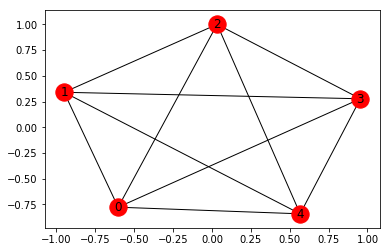

(0, 1), S = ()
(0, 2), S = ()
(0, 3), S = ()


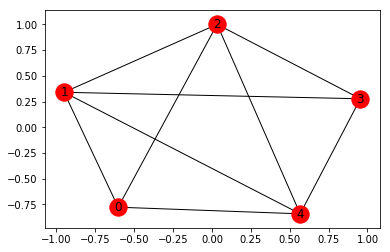

Removed 0, 3
(0, 4), S = ()
(1, 0), S = ()
(1, 2), S = ()
(1, 3), S = ()
(1, 4), S = ()
(2, 0), S = ()
(2, 1), S = ()
(2, 3), S = ()
(2, 4), S = ()
(3, 1), S = ()
(3, 2), S = ()
(3, 4), S = ()
(4, 0), S = ()
(4, 1), S = ()
(4, 2), S = ()
(4, 3), S = ()
(0, 1), S = (2,)
(0, 1), S = (4,)
(0, 2), S = (1,)


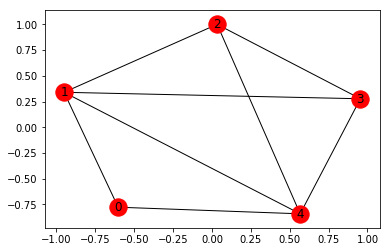

Removed 0, 2
(0, 2), S = (4,)
(0, 4), S = (1,)


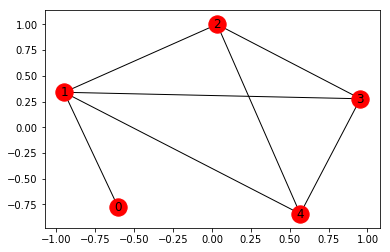

Removed 0, 4
(1, 0), S = (2,)
(1, 0), S = (3,)
(1, 0), S = (4,)
(1, 2), S = (0,)
(1, 2), S = (3,)
(1, 2), S = (4,)
(1, 3), S = (0,)
(1, 3), S = (2,)
(1, 3), S = (4,)
(1, 4), S = (0,)
(1, 4), S = (2,)
(1, 4), S = (3,)
(2, 1), S = (3,)
(2, 1), S = (4,)
(2, 3), S = (1,)
(2, 3), S = (4,)
(2, 4), S = (1,)
(2, 4), S = (3,)
(3, 1), S = (2,)
(3, 1), S = (4,)
(3, 2), S = (1,)
(3, 2), S = (4,)
(3, 4), S = (1,)
(3, 4), S = (2,)


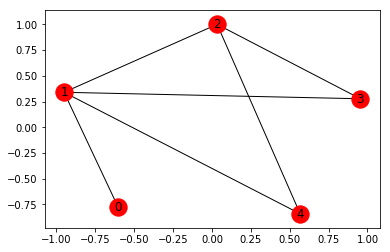

Removed 3, 4
(4, 1), S = (2,)
(4, 2), S = (1,)
(1, 0), S = (2, 3)
(1, 0), S = (2, 4)
(1, 0), S = (3, 4)
(1, 2), S = (0, 3)
(1, 2), S = (0, 4)
(1, 2), S = (3, 4)


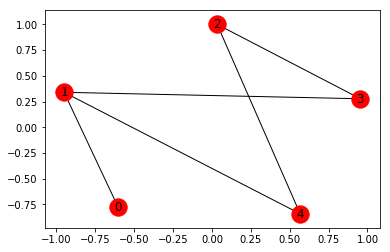

Removed 1, 2
(1, 3), S = (0, 4)
(1, 4), S = (0, 3)


In [57]:
import numpy as np
import pandas as pd
import csv
from itertools import combinations, permutations
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from gsq.ci_tests import ci_test_bin, ci_test_dis
from gsq.gsq_testdata import bin_data, dis_data


dag_data = np.genfromtxt('dag.csv', delimiter=',')
data = dag_data[1:,1:]
# Nodes of the graph
nodes = range(5)
l = -1




from gsq.gsq_testdata import bin_data, dis_data
dm = np.array(bin_data).reshape((5000, 5))

# Creating the full undirected graph to start with:
Graph = nx.Graph()
Graph.add_nodes_from(nodes)
for (i, j) in combinations(nodes, 2):
    Graph.add_edge(i, j)
    pass


alpha = 0.01
data = []
pos = nx.spring_layout(Graph)
plt.figure()
nx.draw_networkx(Graph,pos=pos)
plt.show()

while True:
    l = l + 1
    for (i, j) in permutations(nodes, 2):
        adjacents = list(Graph.neighbors(i))
        if j in adjacents:
            adjacents.remove(j)
            if len(adjacents)>=l:
                for S in combinations(adjacents, l):
                    print("(%d, %d), S = %s" %(i, j, str(S)))
                    p_val = ci_test_bin(dm, i, j, set(S))
                    if p_val > alpha:
                        Graph.remove_edge(i, j)
                        plt.figure()
                        nx.draw_networkx(Graph,pos=pos)
                        plt.show()
                        print("Removed %d, %d" %(i, j))
    if l == 5:
        break

In [ ]:
import numpy as np
from fcit import fcit

# Generate some data such that x is indpendent of y given z.
n_samples = 1000
z = np.random.dirichlet(alpha=np.ones(2), size=n_samples)
x = np.vstack([np.random.multinomial(20, p) for p in z]).astype(float)
y = np.vstack([np.random.multinomial(20, p) for p in z]).astype(float)

# Check that x and y are dependent (p-value should be uniform on [0, 1]).
pval_d = fcit.test(x, y)
# Check that z d-separates x and y (the p-value should be small).
pval_i = fcit.test(x, y, z)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
dag_data = np.genfromtxt('dag.csv', delimiter=',')
data = dag_data[1:,:]

def test (data, x, y, set):
    if (len(set) == 0):
        return
    else:
        data_x = data[:, x]
        data_y = data[:, y]
        j = 0

        data_z = np.zeros([len(data_x), len(set)])

        for i in set:
            data_z[:, j] = data[:, i]
            j += 1
        reg = LinearRegression().fit(data_z, data_x)
        pred_x = reg.predict(data_z)


        residual_x = pred_x - data_x
        reg = LinearRegression().fit(data_z, data_y)
        pred_y = reg.predict(data_z)
        residual_y = data_y - pred_y
    
        partial_corr = np.corrcoef(residual_y, residual_x)
        partial_corr = partial_corr[1, 0]
        
        z = 0.5*np.log((1+partial_corr)/(1-partial_corr))
        r = np.corrcoef(data_x, data_y)
        r = r[0, 1]
        z = (z - 0.5*(np.log((1+r)/(1-r))))*np.sqrt(len(data_x)-3)
        pval = norm.cdf(z)
        print(pval*100)

test(data, 1, 3, [2])

In [12]:
def test (data, x, y, set):
    if (len(set) == 0):
        return
    else:
        data_x = data[:, x]
        data_y = data[:, y]
        j = 0

        data_z = np.zeros([len(data_x), len(set)])

        for i in set:
            data_z[:, j] = data[:, i]
            j += 1
        reg = LinearRegression().fit(data_z, data_x)
        pred_x = reg.predict(data_z)


        residual_x = pred_x - data_x
        reg = LinearRegression().fit(data_z, data_y)
        pred_y = reg.predict(data_z)
        residual_y = data_y - pred_y
    
        partial_corr = np.corrcoef(residual_y, residual_x)
        partial_corr = partial_corr[1, 0]
        
        z = 0.5*np.log((1+partial_corr)/(1-partial_corr))
        r = np.corrcoef(data_x, data_y)
        r = r[0, 1]
        z = (z - 0.5*(np.log((1+r)/(1-r))))*np.sqrt(len(data_x)-3)
        pval = norm.cdf(z)
        print(pval*100)
